#**AIM:**Develop an Artificial Neural Network (ANN) model to analyze and classify a given dataset by preprocessing the data, transforming features, and applying deep learning techniques. The objective is to optimize model performance using suitable activation functions, loss functions, and optimization algorithms to achieve high classification accuracy.  (Refer ANN lab 4 file). Submit your executable and pdf file.

In [ ]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
data = loadmat(r"/content/Matlab_cancer.mat")
X = data['x']
y = data['t']

In [ ]:
X

array([[0.46290091, 0.37056537, 0.46155037, ..., 0.58252595, 0.63768441,
        0.52859127],
       [0.40673611, 0.30643103, 0.27898015, ..., 0.4498    , 0.49972172,
        0.45315089],
       [0.30621525, 0.23971475, 0.20660846, ..., 0.34488742, 0.33761557,
        0.41943002],
       ...,
       [0.08009822, 0.23816822, 0.23361855, ..., 0.15979104, 0.13400809,
        0.1597645 ],
       [0.14462108, 0.18637254, 0.17546801, ..., 0.10701832, 0.1389127 ,
        0.29903768],
       [0.10640488, 0.12637318, 0.0999025 , ..., 0.17790702, 0.177601  ,
        0.17012326]])

In [ ]:
y

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
print(X.shape,y.shape)

(100, 216) (2, 216)


In [ ]:
print(type(X))

<class 'numpy.ndarray'>


In [ ]:
df=pd.DataFrame(X)
df

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
0,0.462901,0.370565,0.461550,0.375149,0.113849,0.233627,0.566678,0.627662,0.381812,0.455935,...,0.518304,0.679998,0.861971,0.891380,0.728070,0.712350,0.442507,0.582526,0.637684,0.528591
1,0.406736,0.306431,0.278980,0.287317,0.108411,0.117294,0.470354,0.523693,0.247376,0.386352,...,0.362863,0.612171,0.716505,0.804140,0.631755,0.577324,0.378966,0.449800,0.499722,0.453151
2,0.306215,0.239715,0.206608,0.241130,0.086275,0.059205,0.377392,0.429015,0.203156,0.284720,...,0.215489,0.502485,0.593316,0.648416,0.551587,0.458963,0.309647,0.344887,0.337616,0.419430
3,0.488105,0.476358,0.744342,0.426810,0.219954,0.284276,0.669022,0.727860,0.543950,0.509489,...,0.587237,0.695925,0.980418,0.931691,0.811608,0.824525,0.579831,0.648084,0.690683,0.608099
4,0.175169,0.175900,0.152133,0.205859,0.050794,0.047048,0.317999,0.318464,0.122031,0.158107,...,0.133816,0.360841,0.480872,0.468973,0.478606,0.327974,0.247915,0.249213,0.226858,0.348519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.102007,0.163589,0.108145,0.129792,0.108191,0.134398,0.182019,0.124871,0.097083,0.155205,...,0.104120,0.126577,0.230165,0.202313,0.147342,0.126562,0.133148,0.124520,0.144252,0.102442
96,1.669069,2.232187,2.142075,1.951741,3.917728,3.067101,0.692836,1.214623,1.396490,1.293816,...,1.839021,0.822627,0.194489,0.544723,0.923899,1.114880,1.785518,0.996573,1.059562,1.750116
97,0.080098,0.238168,0.233619,0.168771,0.246519,0.138255,0.049109,0.076610,0.271379,0.064827,...,0.178631,0.075754,0.019391,0.100852,0.145998,0.132422,0.185799,0.159791,0.134008,0.159765
98,0.144621,0.186373,0.175468,0.136800,0.079653,0.055678,0.314902,0.213265,0.158562,0.079212,...,0.097148,0.162369,0.448877,0.295088,0.220984,0.195418,0.161314,0.107018,0.138913,0.299038


In [ ]:
df=pd.DataFrame(y)
df

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
X_transposed = X.T
print("\nTransposed DataFrame X:")
print(X_transposed)



Transposed DataFrame X:
[[0.46290091 0.40673611 0.30621525 ... 0.08009822 0.14462108 0.10640488]
 [0.37056537 0.30643103 0.23971475 ... 0.23816822 0.18637254 0.12637318]
 [0.46155037 0.27898015 0.20660846 ... 0.23361855 0.17546801 0.0999025 ]
 ...
 [0.58252595 0.4498     0.34488742 ... 0.15979104 0.10701832 0.17790702]
 [0.63768441 0.49972172 0.33761557 ... 0.13400809 0.1389127  0.177601  ]
 [0.52859127 0.45315089 0.41943002 ... 0.1597645  0.29903768 0.17012326]]


In [ ]:
y_transposed = y.T
print("\nTransposed DataFrame y:")
print(y_transposed)


Transposed DataFrame y:
[[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [

In [ ]:
print(X_transposed.shape,y_transposed.shape)

(216, 100) (216, 2)


In [ ]:
assert len(X_transposed) == len(y_transposed), "Length of X and y must match"

In [ ]:
dfy=pd.DataFrame(y_transposed)
dfy

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
211,0,1
212,0,1
213,0,1
214,0,1


In [ ]:
def map_binary_to_label(row):
    if row[0] == 0 and row[1] == 1:
        return 'Normal'
    elif row[0] == 1 and row[1] == 0:
        return 'Cancer'
    else:
        return 'Unknown'
dfy['N/C'] = dfy.apply(map_binary_to_label, axis=1)
print("\nDataFrame with Target Labels:")
print(dfy[['N/C']])


DataFrame with Target Labels:
        N/C
0    Cancer
1    Cancer
2    Cancer
3    Cancer
4    Cancer
..      ...
211  Normal
212  Normal
213  Normal
214  Normal
215  Normal

[216 rows x 1 columns]


In [ ]:
y=dfy[['N/C']]
y

,N/C
0,Cancer
1,Cancer
2,Cancer
3,Cancer
4,Cancer
...,...
211,Normal
212,Normal
213,Normal
214,Normal


In [ ]:
y.value_counts()

,count
N/C,
Cancer,121
Normal,95


In [ ]:
y=pd.get_dummies(y, drop_first=True)
y.sample(5)

,N/C_Normal
29,False
213,True
198,True
63,False
159,True


In [ ]:
y.dtypes

,0
N/C_Normal,bool


In [ ]:
X=(X_transposed)
X

array([[0.46290091, 0.40673611, 0.30621525, ..., 0.08009822, 0.14462108,
        0.10640488],
       [0.37056537, 0.30643103, 0.23971475, ..., 0.23816822, 0.18637254,
        0.12637318],
       [0.46155037, 0.27898015, 0.20660846, ..., 0.23361855, 0.17546801,
        0.0999025 ],
       ...,
       [0.58252595, 0.4498    , 0.34488742, ..., 0.15979104, 0.10701832,
        0.17790702],
       [0.63768441, 0.49972172, 0.33761557, ..., 0.13400809, 0.1389127 ,
        0.177601  ],
       [0.52859127, 0.45315089, 0.41943002, ..., 0.1597645 , 0.29903768,
        0.17012326]])

In [ ]:
X=pd.DataFrame(X_transposed)
X.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
110,0.250096,0.229881,0.256449,0.307399,0.201212,0.124725,0.207350,0.129557,0.772257,0.913639,...,1.082415,0.849199,0.285197,0.602734,0.164935,0.100488,2.251632,0.267626,0.068466,0.106042
120,0.295168,0.165067,0.127236,0.395575,0.146060,0.234664,0.295261,0.191450,0.814383,0.982303,...,0.944625,0.787390,0.246565,1.070875,0.122878,0.059537,1.424828,0.171343,0.050038,0.109025
112,0.287073,0.267607,0.254908,0.361012,0.207055,0.225791,0.275390,0.174402,0.997821,1.170374,...,1.052506,0.849207,0.325415,0.328573,0.157355,0.064820,1.630823,0.150521,0.072500,0.088598
25,0.393872,0.245990,0.091503,0.483410,0.014652,0.320047,0.391286,0.243060,0.744188,0.932535,...,1.939180,1.531859,0.388105,0.485707,0.083975,0.086256,2.069566,0.247291,0.092697,0.193086
34,0.305873,0.230314,0.166259,0.365066,0.126493,0.363315,0.533762,0.241544,1.781914,2.112262,...,0.642804,0.477863,0.175061,0.807011,0.150566,0.124127,0.991051,0.049412,0.262059,0.151984


In [ ]:
print(X.shape,y.shape)

(216, 100) (216, 1)


In [ ]:
df = pd.concat([X, y], axis=1)
print(df)

            0         1         2         3         4         5         6  \
0    0.462901  0.406736  0.306215  0.488105  0.175169  0.356551  0.439552   
1    0.370565  0.306431  0.239715  0.476358  0.175900  0.353762  0.476071   
2    0.461550  0.278980  0.206608  0.744342  0.152133  0.247645  0.304292   
3    0.375149  0.287317  0.241130  0.426810  0.205859  0.208770  0.283752   
4    0.113849  0.108411  0.086275  0.219954  0.050794  0.116163  0.188402   
..        ...       ...       ...       ...       ...       ...       ...   
211  0.712350  0.577324  0.458963  0.824525  0.327974  0.552057  0.708814   
212  0.442507  0.378966  0.309647  0.579831  0.247915  0.423040  0.560928   
213  0.582526  0.449800  0.344887  0.648084  0.249213  0.394702  0.497559   
214  0.637684  0.499722  0.337616  0.690683  0.226858  0.410199  0.518084   
215  0.528591  0.453151  0.419430  0.608099  0.348519  0.540139  0.716755   

            7         8         9  ...        91        92        93  \
0  

In [ ]:
df.shape

(216, 101)

In [ ]:
df.isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
96,0
97,0
98,0
99,0


In [ ]:
df.columns

Index([           0,            1,            2,            3,            4,
                  5,            6,            7,            8,            9,
       ...
                 91,           92,           93,           94,           95,
                 96,           97,           98,           99, 'N/C_Normal'],
      dtype='object', length=101)

In [ ]:
X = df.drop('N/C_Normal', axis=1)
y = df['N/C_Normal']
y.head()

,N/C_Normal
0,False
1,False
2,False
3,False
4,False


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
117,0.219671,0.174610,0.145977,0.278734,0.105277,0.388147,0.476471,0.275036,1.506891,1.746563,...,0.373210,0.318407,0.144132,1.670281,0.073720,0.128882,1.306535,0.189869,0.148303,0.122348
47,0.335567,0.196353,0.097065,0.413689,0.087901,0.344336,0.457342,0.242717,1.537546,1.645754,...,0.534452,0.391630,0.234312,1.250842,0.108260,0.086975,1.254973,0.188962,0.133162,0.167043
27,0.381793,0.230879,0.130748,0.509708,0.094454,0.325208,0.461303,0.181154,1.562314,1.840856,...,0.438801,0.310663,0.153057,0.530887,0.149323,0.144372,1.416809,0.180572,0.190383,0.070508
59,0.446608,0.428062,0.355256,0.430199,0.241816,0.335200,0.437496,0.236318,1.179894,1.444809,...,0.689632,0.573892,0.201312,0.658324,0.106453,0.093083,0.883419,0.207201,0.184168,0.099087
40,0.503529,0.397826,0.265457,0.607199,0.164204,0.433760,0.586963,0.294950,1.569394,1.817672,...,0.826620,0.655021,0.180735,0.968595,0.095633,0.160629,1.389370,0.171994,0.227377,0.165386


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(60, input_dim=100, activation='relu'),
     keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5096 - loss: 0.7472
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8565 - loss: 0.5259 
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8590 - loss: 0.4265 
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8368 - loss: 0.4024 
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8278 - loss: 0.3660 
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8665 - loss: 0.3347
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8678 - loss: 0.3112
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8780 - loss: 0.2901 
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9002 - loss: 0.2722
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8616 - loss: 0.2858
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8893 - loss: 0.2623 
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8649 - lo

In [ ]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9337 - loss: 0.1205 


[0.11532134562730789, 0.9318181872367859]

In [ ]:
y_pred = model.predict(X_test).reshape(-1)
print(y_pred[:10])
y_pred = np.round(y_pred)
print(y_pred[:10])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
[1.4548392e-02 7.5271912e-02 2.4556571e-03 3.5990149e-02 6.4571791e-06
 1.1544002e-02 3.6693141e-03 6.6665798e-01 5.6130576e-01 1.2584678e-06]
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.93      0.95        30
        True       0.87      0.93      0.90        14

    accuracy                           0.93        44
   macro avg       0.92      0.93      0.92        44
weighted avg       0.93      0.93      0.93        44



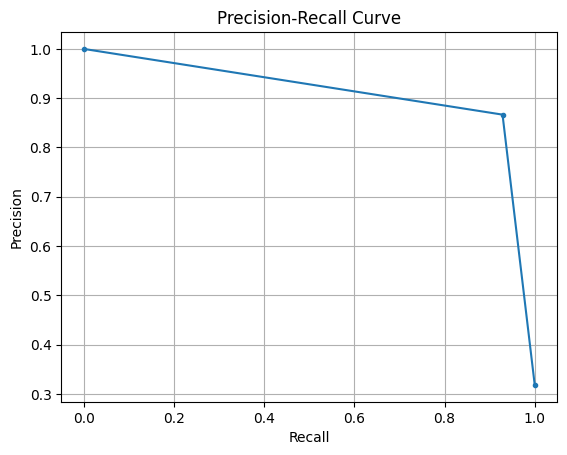

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

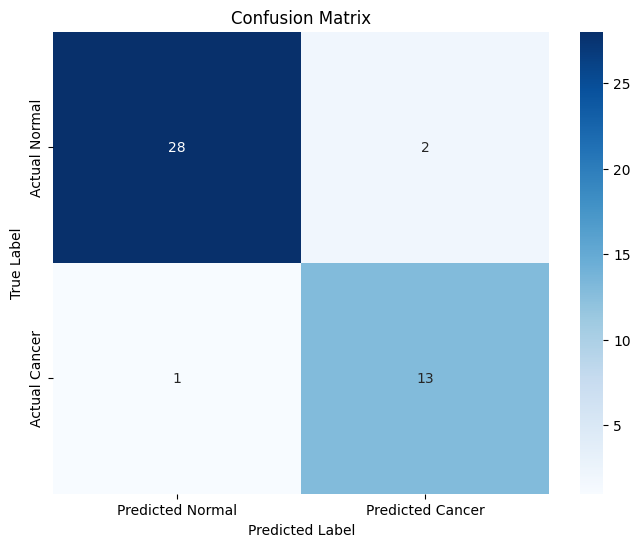

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Normal", "Predicted Cancer"],
            yticklabels=["Actual Normal", "Actual Cancer"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

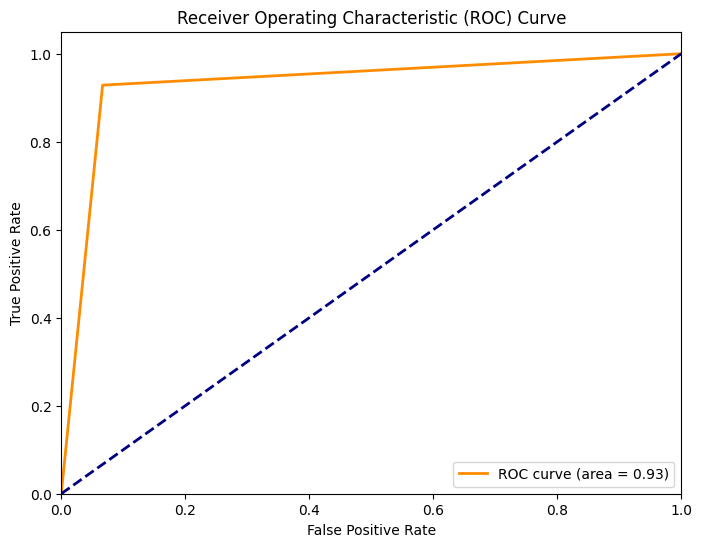

AUC: 0.930952380952381


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    print(f"AUC: {roc_auc}")
plot_roc_curve(y_test, y_pred)

#**CONCLUSION:**

In this experiment, an Artificial Neural Network (ANN) model was developed for data classification by applying deep learning techniques. The dataset was preprocessed, features were transformed, and various activation functions, loss functions, and optimization algorithms were tested to enhance model performance. The results demonstrated that selecting appropriate hyperparameters and network architecture significantly impacts accuracy and generalization. Through experimentation, the optimal model configuration was identified, achieving high classification accuracy.